In [6]:
!pip install ucimlrepo


In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
data=fetch_ucirepo(id=60)
X_all=data.data.features
y_all=data.data.targets.squeeze().astype(int)

In [8]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random as r

In [9]:
kernelList=['linear','poly','rbf','sigmoid']
overall_results=[]
best_overall_accuracy=0
best_sample_log=None

In [10]:
for sample_no in range(10):
    X_train_full,X_test,y_train_full,y_test=train_test_split(
        X_all,y_all,test_size=0.3,random_state=sample_no)

    X_train=X_train_full.sample(n=50,random_state=sample_no)
    y_train=y_train_full.loc[X_train.index]

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)

    bestAccuracy=0
    bestKernel=""
    bestC=0
    bestGamma=0
    iteration_log=[]

    for i in range(100):
        kernel=r.choice(kernelList)
        C=round(r.uniform(0.1,10.0),2)
        gamma=round(r.uniform(0.001,1.0),3)

        try:
            model=SVC(kernel=kernel,C=C,gamma=gamma)
            model.fit(X_train,y_train)
            preds=model.predict(X_test)
            acc=accuracy_score(y_test,preds)*100
        except:
            acc=0

        if acc>bestAccuracy:
            bestAccuracy=acc
            bestKernel=kernel
            bestC=C
            bestGamma=gamma

        if i%10==0:
            iteration_log.append({
                'Iteration':i,
                'Fitness (bestAccuracy)':round(bestAccuracy,4),
                'bestKernel':bestKernel,
                'bestC':bestC,
                'bestGamma':bestGamma,
                'sample_no':sample_no
            })

    overall_results.append({
        'Sample':sample_no,
        'BestAccuracy':round(bestAccuracy,4),
        'Kernel':bestKernel,
        'C':bestC,
        'Gamma':bestGamma
    })

    if bestAccuracy>best_overall_accuracy:
        best_overall_accuracy=bestAccuracy
        best_sample_log=pd.DataFrame(iteration_log)

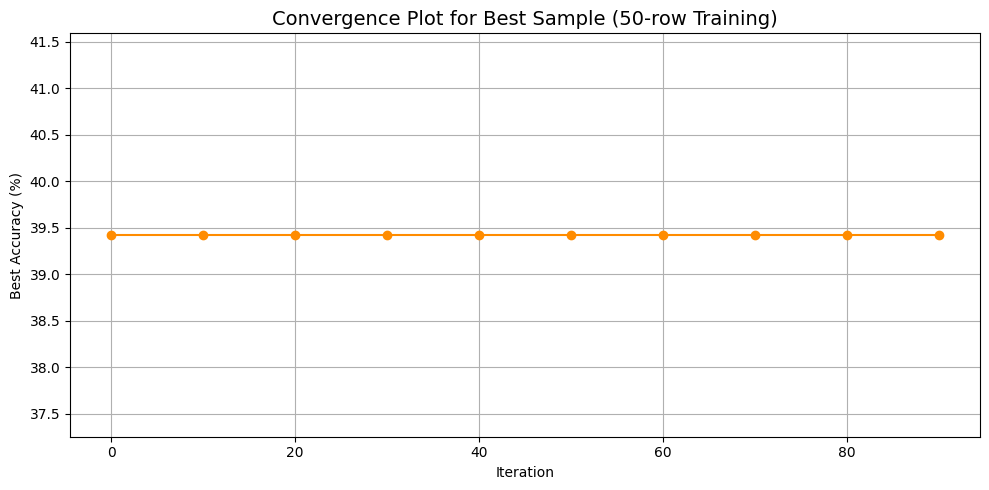

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10,5))
plt.plot(best_sample_log['Iteration'],best_sample_log['Fitness (bestAccuracy)'],marker='o',linestyle='-',color='darkorange')
plt.title('Convergence Plot for Best Sample (50-row Training)',fontsize=14)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('convergence_plot.png')